In [1]:
import numpy as np
import random
import networkx as nx
from  matplotlib  import pyplot as plt
import time

import sys
#sys.path.append("/home/jaeger/B/Python/GraphRNN")
sys.path.append("/home/jaeger/B/Python/GraphScoreMatching/")
sys.path.append("/home/jaeger/B/Python/GraphScoreMatching/utils")
sys.path.append("/home/jaeger/B/Python/GraphScoreMatching/evaluation")


#from GraphRNN import model,data,utils,create_graphs,args
from GraphScoreMatching import evaluation
from GraphScoreMatching.utils import data_generators_new
from GraphScoreMatching.evaluation import stats
import pickle as pkl


### Loading networkx graphs from .pkl files

In [9]:
#
# Mutag data
#

# sampled_gsm="/home/jaeger/B/Python/GraphScoreMatching/exp/mutag/edp-gnn_mutag__Mar-13-08-51-07_867584/sample/sample_data/sampled.pkl"
# trainfile="/home/jaeger/B/Python/AHK/Data/mutag.pkl"
# sampled_ahk="/home/jaeger/B/Python/AHK/Experiments/sample_mutag.pkl"

# # community_small data
# trainfile="/home/jaeger/B/Python/GraphScoreMatching/data/community_small.pkl"
# # from claaudia:
# sampled_gsm="/home/jaeger/B/Python/GraphScoreMatching/exp/community_small/edp-gnn_community_small__Mar-15-19-24-49_1178959/sample/sample_data/community_small_[0.1, 0.2, 0.4, 0.6, 0.8, 1.6].pth_0.001_0.5_sample.pkl"


# community uneven:
# train/test: randomly generated graphs with two communities; Generated from an AHK model
# 'uneven' because 
# nodes are randomly assigned to communities, and communities will be of unequal size
# (unlike the standard communities graphs found e.g. in the GraphScoreMatching code, where there 
# are always two communities of equal size)
trainfile = "/home/jaeger/B/Python/AHK/Data/community_small_uneven.pkl"
testfile = "/home/jaeger/B/Python/AHK/Data/community_small_uneven_test.pkl"
# Sampled graphs from a learned GraphScoreMatching and a learned AHK model
sampled_gsm = "/home/jaeger/B/Python/AHK/Data/community_small_[0.1, 0.2, 0.4, 0.6, 0.8, 1.6].pth_0.001_0.5_sample.pkl"
sampled_ahk = "/home/jaeger/B/Python/AHK/Experiments/Community_uneven/sample_22-03-2023_11:34:01"


graphs_train=pkl.load(open(trainfile,"rb"))
graphs_test=pkl.load(open(testfile,"rb"))
graphs_gsm=pkl.load(open(sampled_gsm,"rb"))
graphs_ahk=pkl.load(open(sampled_ahk,"rb"))

#genfile="/home/jaeger/B/Python/GraphScoreMatching/exp/community_small/edp-gnn_community_small__Feb-10-15-01-11_13585/sample/sample_data/community_small_[0.1, 0.2, 0.4, 0.6, 0.8, 1.6].pth_0.001_0.5_sample.pkl"



### Generating random ER  graphs with node/edge counts matching some training set

In [4]:
trainset=graphs_ahk
samplesize=200
graphs_ER=[]

for s in range(samplesize):
    tg=trainset[np.random.randint(len(trainset))]

    n=tg.number_of_nodes()
    e=tg.number_of_edges()
    graphs_ER.append(nx.erdos_renyi_graph(n,e/(n*(n-1)/2)))
    #graphs_ER.append(nx.erdos_renyi_graph(n,0.1))

### Plotting random selection of graphs

graph  366    15  nodes


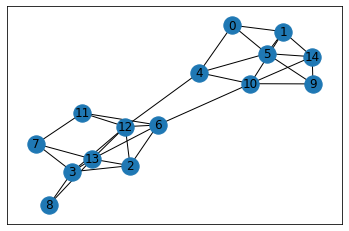

graph  624    13  nodes


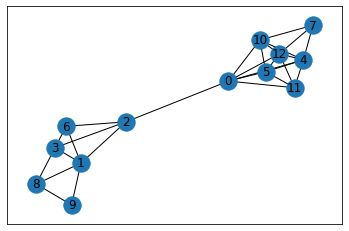

graph  804    12  nodes


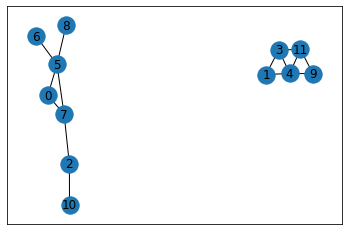

graph  223    14  nodes


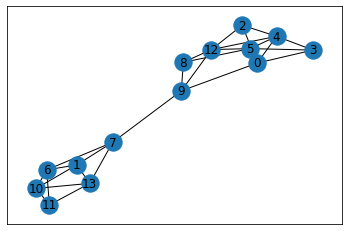

graph  727    12  nodes


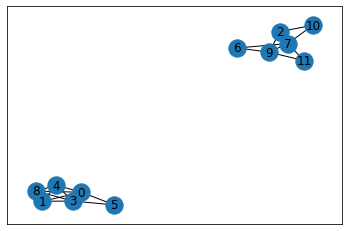

graph  88    19  nodes


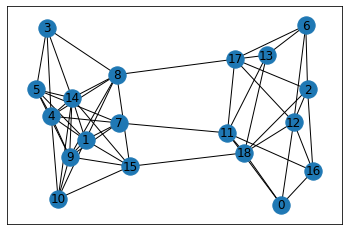

graph  99    12  nodes


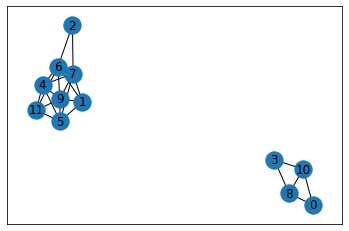

graph  962    17  nodes


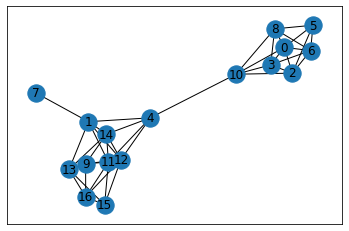

graph  796    12  nodes


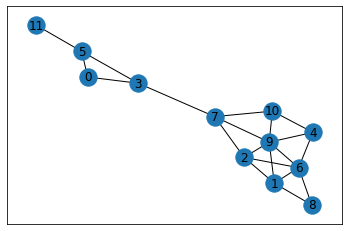

graph  629    17  nodes


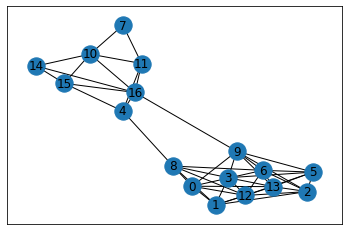

In [10]:
graphset=graphs_ahk
numgraphs=10
randidxs=np.random.randint(len(graphset), size=numgraphs)

for i in randidxs:
    print("graph ",i, "  " , graphset[i].number_of_nodes(), " nodes")
    nx.draw_networkx(graphset[i])
    plt.show()

# nx.draw_networkx(Gdata_test[0])
# plt.show()


### Plotting some graph statistics

In [12]:
def get_degrees(graph):
    return np.array([val for (node, val) in graph.degree()])

def n_nodes(graphset):
    return np.array([g.number_of_nodes() for g in graphset])
   
def n_edges(graphset):
    return np.array([g.number_of_edges() for g in graphset])

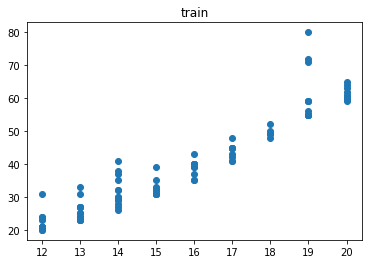

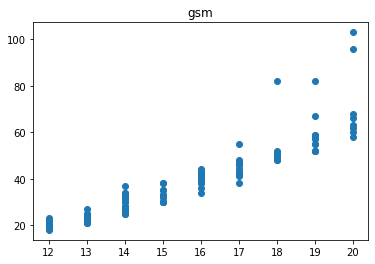

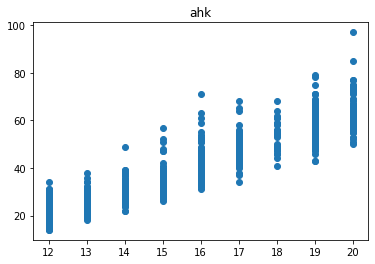

In [13]:
suffixes=["train","gsm","ahk"]
datasets=[graphs_train,graphs_gsm,graphs_ahk]




for s,d in zip(suffixes,datasets):
    plt.scatter(n_nodes(d),n_edges(d))
    plt.title(s)
    plt.show()

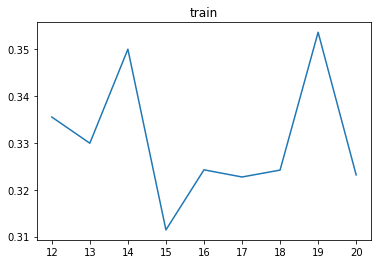

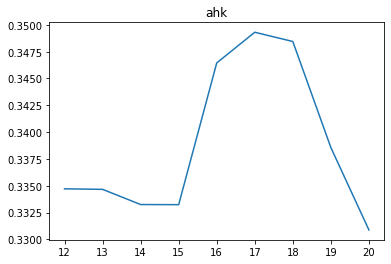

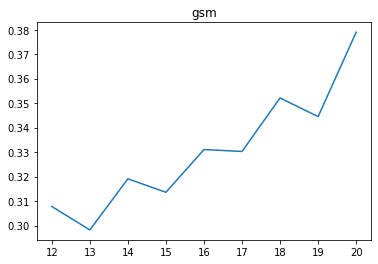

In [14]:
suffixes=["train","ahk","gsm"]
datasets=[graphs_train,graphs_ahk,graphs_gsm]


for s,d in zip(suffixes,datasets):
    edge_numbers=n_edges(d)
    node_numbers=n_nodes(d)
    unique_sizes=np.unique(node_numbers)
    avg_densities=np.array(list(np.average(edge_numbers[np.where(node_numbers==us)]/(us*(us-1)/2))\
                            for us in unique_sizes))


    plt.plot(unique_sizes,avg_densities)
    plt.title(s)
    plt.show()

### Comparison using the metrics from GraphScoreMatching.evaluation

In [18]:
suffixes=["train","ahk","gsm"]
# train is included to have as a point of reference the score obtained by 
# a graph generator that just randomly returns a training graph 
datasets=[graphs_train,graphs_ahk,graphs_gsm]


for s,d in zip(suffixes,datasets):
    print(s, ": average number of edges: ", np.average(np.array(list(G.number_of_edges() for G in d))))
print()
size=100

summary={}

for s,d in zip(suffixes,datasets):
    print("Evaluation for ", s)
    results=[]
    for i in range(5):
        testset=random.choices(graphs_train,k=size)
        genset=random.choices(d,k=size)
        results.append(stats.degree_stats(testset,genset))
    summary[s]=(np.average(results), np.std(results))
    print("Avg: ", np.average(results), " Std: ", np.std(results), '\n')

print("Summary: ")    
for s in suffixes:
    print(s, " : " , summary[s])

train : average number of edges:  39.08
ahk : average number of edges:  39.322
gsm : average number of edges:  36.5234375
Evaluation for  train
100 100
Time computing degree mmd:  0:00:00.843125
100 100
Time computing degree mmd:  0:00:00.848442
100 100
Time computing degree mmd:  0:00:00.884137
100 100
Time computing degree mmd:  0:00:00.885285
100 100
Time computing degree mmd:  0:00:00.845938
Avg:  0.010098042977202227  Std:  0.007918873624388593 

Evaluation for  ahk
100 100
Time computing degree mmd:  0:00:00.917693
100 100
Time computing degree mmd:  0:00:00.958421
100 100
Time computing degree mmd:  0:00:00.881984
100 100
Time computing degree mmd:  0:00:00.967923
100 100
Time computing degree mmd:  0:00:01.003451
Avg:  0.02121832865010087  Std:  0.008575348090541638 

Evaluation for  gsm
100 100
Time computing degree mmd:  0:00:00.843676
100 100
Time computing degree mmd:  0:00:00.846807
100 100
Time computing degree mmd:  0:00:00.885840
100 100
Time computing degree mmd:  0:00

# Community evaluations

Use a community detection algorithm to cluster generated graphs into communities; use modularity score to measure the 'community-ness' of the graphs.

In [19]:
from networkx.algorithms import community

In [20]:
suffixes=["test","gsm","ahk"]
datasets=[graphs_test,graphs_gsm,graphs_ahk]



summary={}


for s,d in zip(suffixes,datasets):

    c_scores=[]

    for i in range(len(d)):
        g=d[i]
        C=community.greedy_modularity_communities(g,cutoff=nx.number_connected_components(g))
        c_scores.append(community.modularity(g,C))
    
    summary[s]=c_scores


In [21]:
print(np.average(summary["test"]))
print(np.average(summary["gsm"]))
print(np.average(summary["ahk"]))


0.3759880719351239
0.39732128959668955
0.36422664710213115


# EMD computation

This is another business that shows that some of the code used in GraphScoreMatching.evaluation is extremely inefficient. 

In [23]:
import pyemd
from scipy.linalg import toeplitz

In [24]:
sizes=[50,100]
emd_pyemd=[]
t_pyemd=[]
emd_cdf=[]
t_cdf=[]

for s in sizes:
    print("size ", s)
    min=1
    max=s
    his1=np.zeros(s)
    his2=np.zeros(s)
    for i in range(s):
        his1[i]=np.random.randint(min,max)
        his2[i]=np.random.randint(min,max)
    his1=his1/np.sum(his1)
    his2=his2/np.sum(his2)

    d_mat = toeplitz(range(s)).astype(np.float)
    start=time.time()
    emd=pyemd.emd(his1,his2,d_mat)
    spent=time.time()-start
    emd_pyemd.append(emd)
    t_pyemd.append(spent)
    print("Pyemd time: ", spent, "emd: ", emd)
    
    start=time.time()

#     cdf1=np.zeros(len(his1))
#     cdf2=np.zeros(len(his1))

#     cdf1[0]=his1[0]
#     cdf2[0]=his2[0]

#     for i in range(1,len(his1)):
#         cdf1[i]=cdf1[i-1]+his1[i]
#         cdf2[i]=cdf2[i-1]+his2[i]

    cdf1=np.cumsum(his1)
    cdf2=np.cumsum(his2)
    emd=np.sum(np.abs(cdf1-cdf2))   
    spent=time.time()-start
    emd_cdf.append(emd)
    t_cdf.append(spent)
    print("cdf emd time: ", spent, "emd: ", emd_pyemd)

   
    
    
    
    
    


size  50
Pyemd time:  0.0031995773315429688 emd:  1.483480352711005
cdf emd time:  7.295608520507812e-05 emd:  [1.483480352711005]
size  100
Pyemd time:  0.008396148681640625 emd:  2.8589311410660114
cdf emd time:  0.00012445449829101562 emd:  [1.483480352711005, 2.8589311410660114]


/tmp/ipykernel_28101/3340198472.py:19: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  d_mat = toeplitz(range(s)).astype(np.float)
